In [1]:
import cv2
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np

In [2]:
Path().cwd()

PosixPath('/Users/lode/projects/awv/python-github-action-template')

In [3]:
URL_BASE_IMAGE = "./shots/rotselaar_20230517-012912.png"
base_image = Path(URL_BASE_IMAGE)
assert base_image.exists()

In [31]:
imb = cv2.cvtColor(cv2.imread(base_image.as_posix()), cv2.COLOR_BGR2RGB)

In [32]:
URL_TEST_IMAGE = "shots/rotselaar_20230515-173440.png"
test_image = Path(URL_TEST_IMAGE)
assert test_image.exists()

In [33]:
im = cv2.cvtColor(cv2.imread(test_image.as_posix()), cv2.COLOR_BGR2RGB)

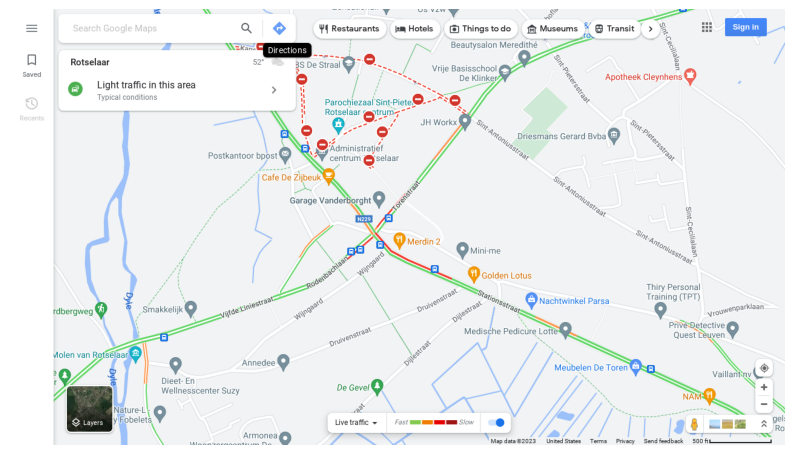

In [34]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.set_axis_off()
plt.imshow(im);

In [35]:
# diff = cv2.subtract(imb, im)
diff = cv2.absdiff(imb, im)

In [36]:
diff.shape

(720, 1280, 3)

In [37]:
gray_diff = cv2.cvtColor(diff, cv2.COLOR_BGR2GRAY)
gray_diff.shape

(720, 1280)

In [38]:
gray_diff.max()

187

In [39]:
(thresh, mask_img) = cv2.threshold(gray_diff, 1, 255, cv2.THRESH_BINARY)

In [40]:
mask_img

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

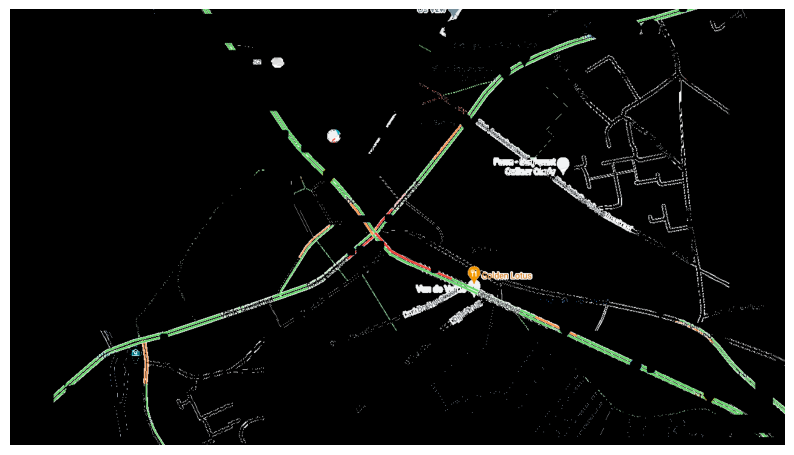

In [51]:
result = cv2.bitwise_and(im, im, mask=mask_img)
fig, ax = plt.subplots(figsize=(10, 10))
ax.set_axis_off()
plt.imshow(result);

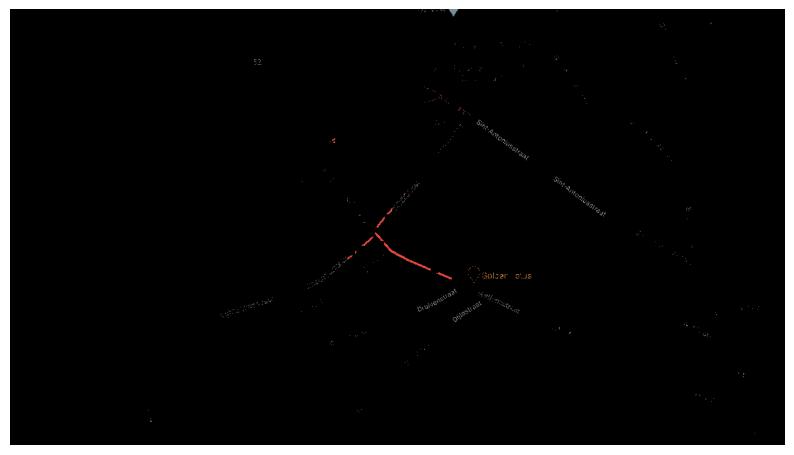

In [55]:
lower_range = np.array([100, 10, 10])
upper_range = np.array([252, 160, 160])
mask = cv2.inRange(result, lower_range, upper_range)
result_within_bounds = cv2.bitwise_and(result, result, mask=mask)
fig, ax = plt.subplots(figsize=(10, 10))
ax.set_axis_off()
plt.imshow(result_within_bounds);

In [41]:
rgb_diff_mask = cv2.cvtColor(mask_img, cv2.COLOR_GRAY2RGB)

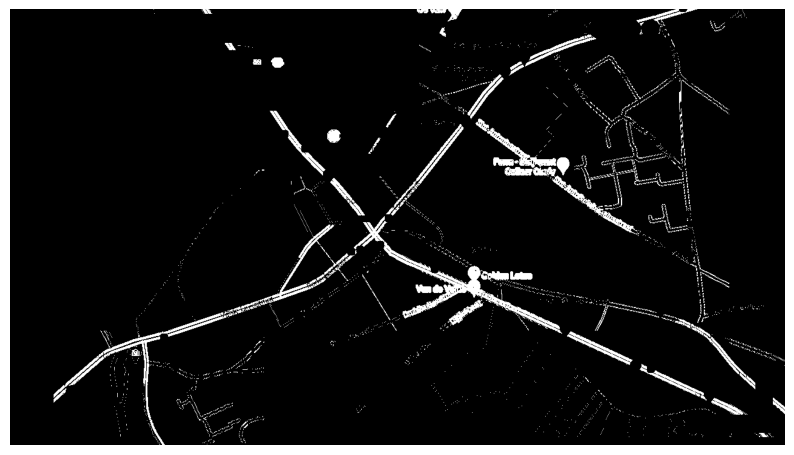

In [42]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.set_axis_off()
plt.imshow(rgb_diff_mask);

In [43]:
# Split the difference image into its color channels
b, g, r = cv2.split(diff)

# Combine the color channels into a single image
zeros = np.zeros(gray_diff.shape[:2], dtype=np.uint8)
diff_image = cv2.merge((mask_img, zeros, zeros))

In [44]:
ret, mask = cv2.threshold(diff_image, 1, 1,cv2.THRESH_BINARY_INV)

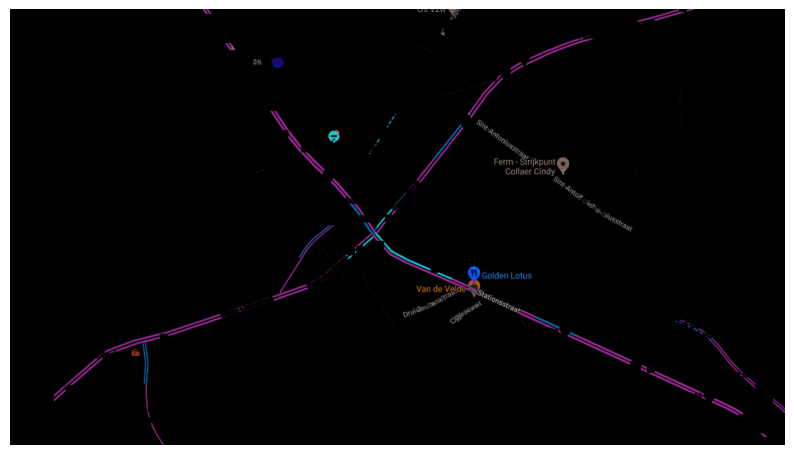

In [45]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.set_axis_off()
plt.imshow(diff);

In [46]:
Conv_hsv_Gray = cv2.cvtColor(diff, cv2.COLOR_BGR2GRAY)

In [47]:
ret, mask = cv2.threshold(Conv_hsv_Gray, 0, 255,cv2.THRESH_BINARY_INV |cv2.THRESH_OTSU)

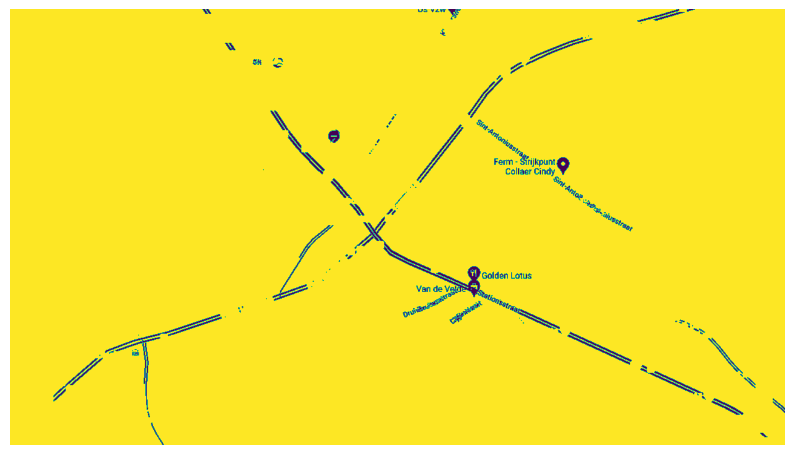

In [48]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.set_axis_off()
plt.imshow(mask);

# Select the red stripes

In [49]:
lower_range = np.array([229, 0, 0])
upper_range = np.array([231, 0, 0])
mask = cv2.inRange(im, lower_range, upper_range)
result = cv2.bitwise_and(im, im, mask=mask)

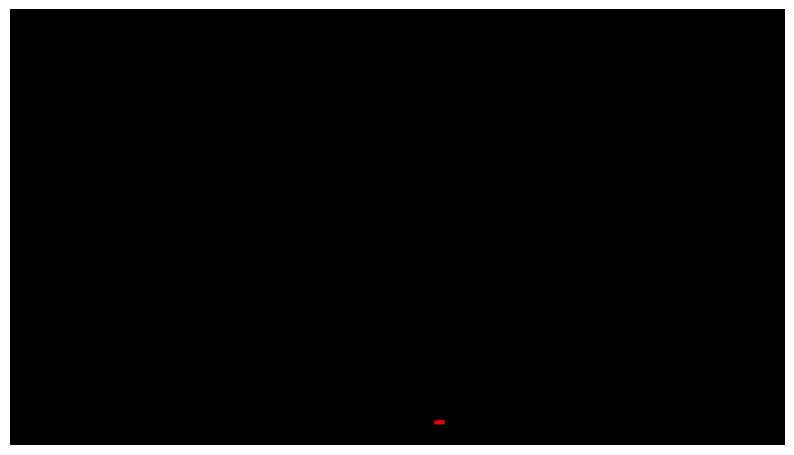

In [50]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.set_axis_off()
plt.imshow(result);